# Visualizing Tips




### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2. Read the dataset

In [2]:
path = 'tips.csv'
tips = pd.read_csv(path)

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 3. Check for nulls and plot a heatmap

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


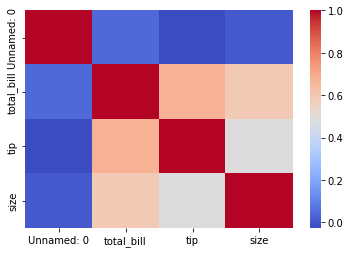

In [4]:
stats = tips.corr()
sns.heatmap(stats, cmap='coolwarm')

Question- why don't we see other columns?

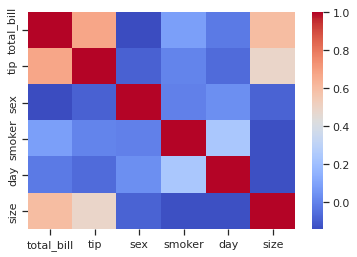

In [16]:
tips_copy = tips.copy()
tips_copy['sex'] = tips_copy['sex'].apply(
    lambda val: 1 if val=='Female' else 0
)
tips_copy['smoker'] = tips_copy['smoker'].apply(
    lambda val: 0 if val=='No' else 1
)
days = {'Sun':1, 'Thur':2, 'Fri':3, 'Sat':4}
tips_copy['day'] = tips_copy['day'].apply(
    lambda val: days[val]
)
stats = tips_copy.corr()
sns.heatmap(stats, cmap='coolwarm')

### Step 4. Delete the Unnamed 0 column

In [5]:
tips = tips.iloc[:, 1:]

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column's distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


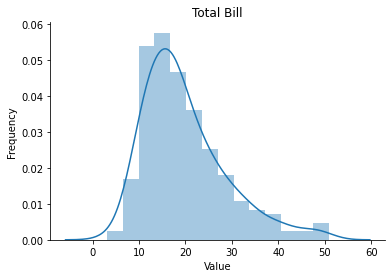

In [6]:
totalbill = sns.distplot(tips.total_bill);
totalbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")
sns.despine()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

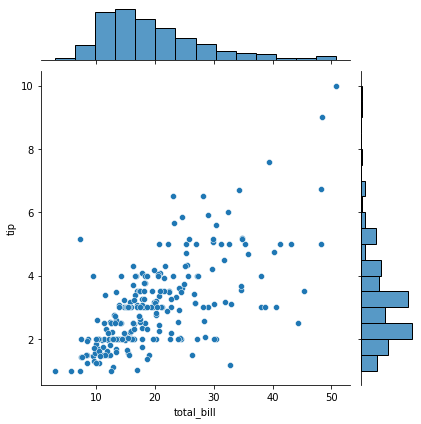

In [7]:
sns.jointplot(x ="total_bill", y ="tip", data = tips)

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

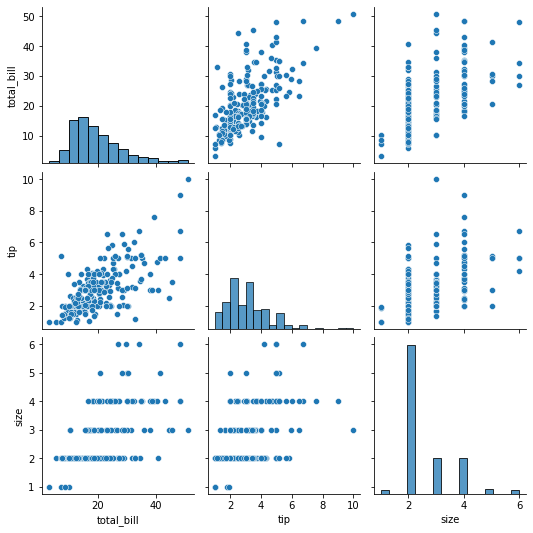

In [8]:
sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

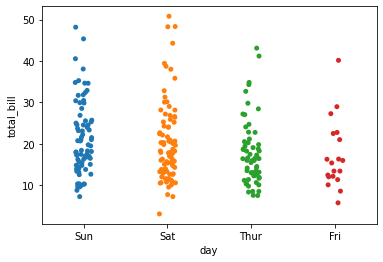

In [9]:
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

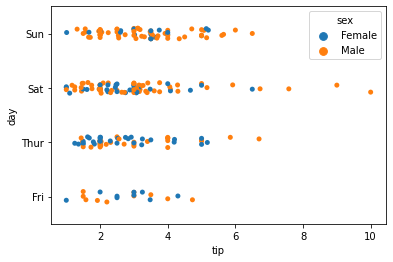

In [10]:
sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True);

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

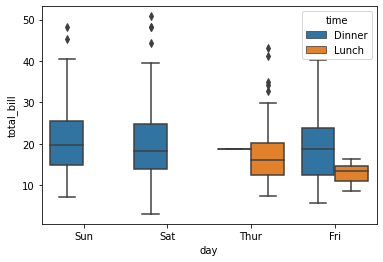

In [11]:
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

Do you see any outliers?

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

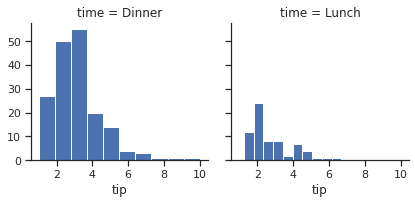

In [12]:
# better seaborn style
sns.set(style = "ticks")

# creates FacetGrid
g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip");

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

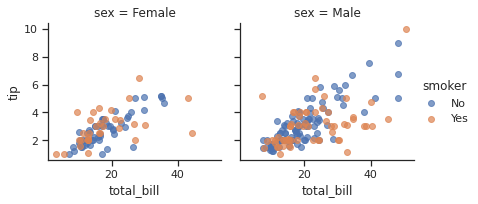

In [13]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend();